<a href="https://colab.research.google.com/github/TABARU-muu/2020615076/blob/main/loan_data_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
import pandas as pd


data = pd.read_csv(os.path.join('data','/content/drive/MyDrive/AI/loan_data.csv'))

In [ ]:
data.head(10)

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,40,6,6,6,0,0,0,4500,0,16,...,1.52,120,500,0,120,0,M,A,A,0
1,35,9,9,0,0,1,0,3700,0,9,...,2.14,100,800,0,0,0,M,C,B,0
2,55,9,9,0,0,0,0,6400,0,1,...,0.50,50,700,0,0,0,M,C,B,0
3,55,42,0,42,0,5,0,8900,0,13,...,2.61,80,900,0,0,0,M,B,C,0
4,40,36,36,36,0,3,1,0,0,2,...,2.11,10,900,0,0,1,F,B,B,0
5,45,141,18,105,33,7,0,0,0,11,...,1.52,80,800,0,0,1,M,B,B,0
6,45,348,0,0,0,3,0,7900,0,3,...,0.69,120,900,1,0,0,F,C,C,0
7,35,123,123,0,0,3,0,3900,0,0,...,3.26,80,900,0,0,1,F,C,C,0
8,40,201,24,201,0,4,0,0,0,11,...,1.57,60,500,0,0,1,F,C,B,0
9,35,75,75,75,0,2,0,4400,0,6,...,7.94,100,0,0,0,1,F,B,B,0


In [ ]:
data_category = data.loc[:,['SEX','PAY_METHOD','JOB']]
data_category


,SEX,PAY_METHOD,JOB
0,M,A,A
1,M,C,B
2,M,C,B
3,M,B,C
4,F,B,B
...,...,...,...
43381,M,D,D
43382,F,D,D
43383,M,D,D
43384,F,D,D


In [ ]:
data_dummy = pd.get_dummies(data_category,columns=['SEX','PAY_METHOD','JOB'])
data_dummy

,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,0,1,1,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1,0,0
3,0,1,0,1,0,0,0,0,1,0
4,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
43381,0,1,0,0,0,1,0,0,0,1
43382,1,0,0,0,0,1,0,0,0,1
43383,0,1,0,0,0,1,0,0,0,1
43384,1,0,0,0,0,1,0,0,0,1


In [ ]:
data_numeric = data.drop(columns=['SEX','PAY_METHOD','JOB'])
data_numeric = pd.concat([data_numeric,data_dummy], axis = 1)
data_numeric

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,40,6,6,6,0,0,0,4500,0,16,...,0,1,1,0,0,0,1,0,0,0
1,35,9,9,0,0,1,0,3700,0,9,...,0,1,0,0,1,0,0,1,0,0
2,55,9,9,0,0,0,0,6400,0,1,...,0,1,0,0,1,0,0,1,0,0
3,55,42,0,42,0,5,0,8900,0,13,...,0,1,0,1,0,0,0,0,1,0
4,40,36,36,36,0,3,1,0,0,2,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,...,0,1,0,0,0,1,0,0,0,1
43382,50,0,0,0,0,1,0,3400,0,0,...,1,0,0,0,0,1,0,0,0,1
43383,45,42,42,0,42,0,0,6300,0,0,...,0,1,0,0,0,1,0,0,0,1
43384,35,0,0,0,0,1,0,4000,0,0,...,1,0,0,0,0,1,0,0,0,1


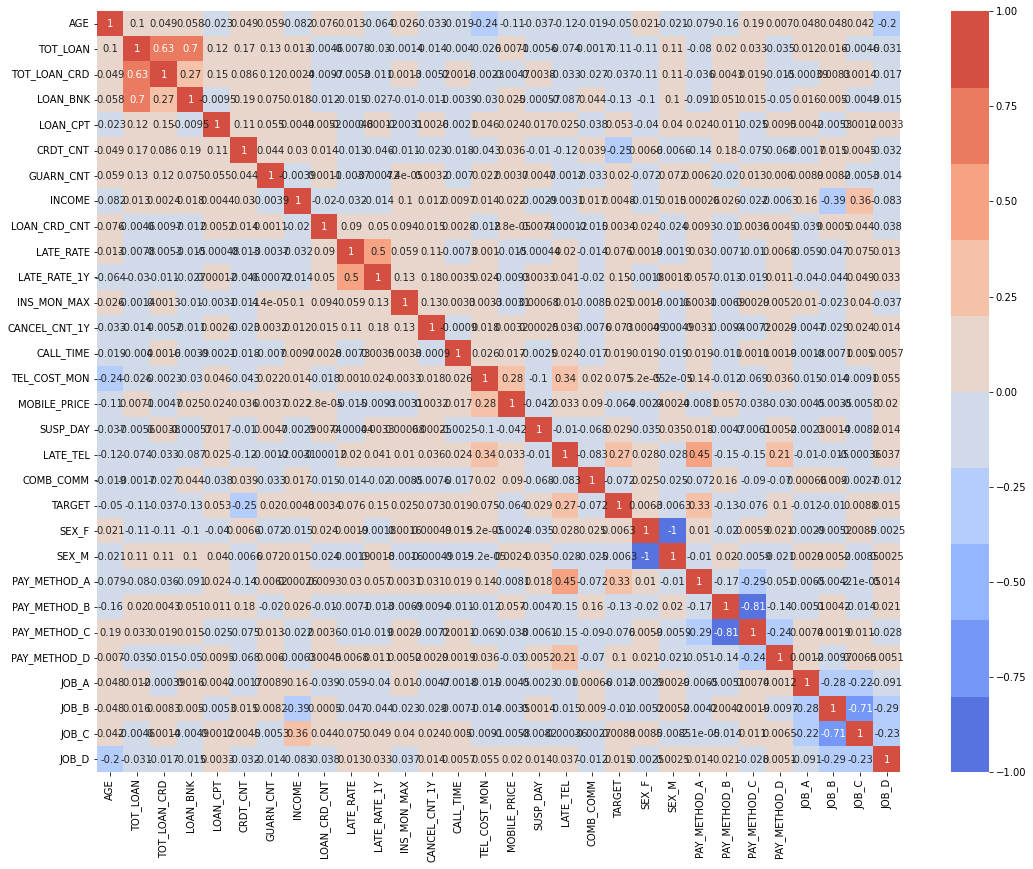

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,14))
sns.heatmap(data_numeric.corr(), cmap=sns.color_palette("coolwarm",10), annot=data_numeric.corr())

In [ ]:
X = data_numeric.drop('TARGET', axis=1)
X

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,40,6,6,6,0,0,0,4500,0,16,...,0,1,1,0,0,0,1,0,0,0
1,35,9,9,0,0,1,0,3700,0,9,...,0,1,0,0,1,0,0,1,0,0
2,55,9,9,0,0,0,0,6400,0,1,...,0,1,0,0,1,0,0,1,0,0
3,55,42,0,42,0,5,0,8900,0,13,...,0,1,0,1,0,0,0,0,1,0
4,40,36,36,36,0,3,1,0,0,2,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,...,0,1,0,0,0,1,0,0,0,1
43382,50,0,0,0,0,1,0,3400,0,0,...,1,0,0,0,0,1,0,0,0,1
43383,45,42,42,0,42,0,0,6300,0,0,...,0,1,0,0,0,1,0,0,0,1
43384,35,0,0,0,0,1,0,4000,0,0,...,1,0,0,0,0,1,0,0,0,1


In [ ]:
y = data_numeric['TARGET'].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=2019,
                                                   stratify=y)

In [ ]:
X_train

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
42413,55,69,0,0,0,0,0,5600,3,1,...,1,0,0,0,1,0,0,0,1,0
24182,55,3,3,0,0,1,0,5500,0,1,...,1,0,0,0,1,0,1,0,0,0
22091,40,12,3,3,6,2,1,4000,0,0,...,0,1,0,1,0,0,0,0,1,0
27719,60,3,3,0,3,1,0,0,0,4,...,0,1,0,0,1,0,0,0,1,0
20657,50,6,6,6,0,3,0,4200,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15528,55,27,21,6,0,3,0,7900,0,2,...,0,1,0,0,1,0,0,1,0,0
18315,60,39,39,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
24565,40,6,3,3,3,2,0,3700,1,6,...,1,0,0,0,1,0,0,0,1,0
42129,40,21,21,0,21,4,0,3600,0,15,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
X_test

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

df = DecisionTreeClassifier(criterion='gini',max_depth=None)

df.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
y_train_pred = df.predict(X_train)
y_test_pred = df.predict(X_test)

print('- Accuracy (Train)      :{:.4}'.format(accuracy_score(y_train,y_train_pred)))
print('- Accuracy (test) : {:.4}'.format(accuracy_score(y_test,y_test_pred)))

print('- F1 score (Train)      :{:.4}'.format(f1_score(y_train,y_train_pred)))
print('- F1 score (test) :{:.4}'.format(f1_score(y_test,y_test_pred)))


- Accuracy (Train)      :1.0
- Accuracy (test) : 0.8904
- F1 score (Train)      :1.0
- F1 score (test) :0.4169


In [ ]:
df.predict(X_train)

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
df.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0758467 to fit


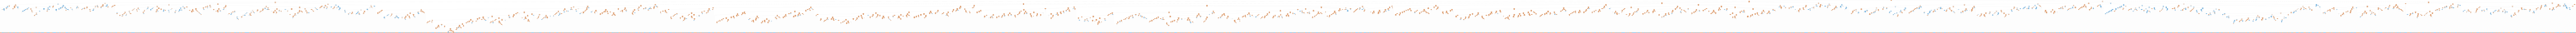

In [ ]:
from graphviz import Source
from IPython.display import Image
from sklearn.tree import export_graphviz

graph = Source(export_graphviz(df,
                               out_file=None,
                               feature_names=X.columns,
                               filled=True,
                               leaves_parallel=True))
png_bytes = graph.pipe(format='png')
Image(png_bytes)

In [60]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
!apt-get -qq install -y libfluidsynth1

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', max_depth=None)

rf.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print('- Accuracy (Train)     : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))

print('- F1 score (Train)     : {:.4}'.format(f1_score(y_train, y_train_pred)))
print('- F1 score (test) : {:.4}'.format(f1_score(y_test, y_test_pred)))


- Accuracy (Train)     : 1.0
- Accuracy (test) : 0.9227
- F1 score (Train)     : 1.0
- F1 score (test) : 0.4119


In [69]:
data_corr = data_numeric[['CRDT_CNT', 'LATE_TEL', 'PAY_METHOD_A']]
X = data_corr

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.20,
                                                    random_state=2019,
                                                    stratify=y)

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', max_depth=None)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print('- Accurac    y (Train)')
print('- Accuracy (Train)     : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))

print('-F1 score (Train)      : {:.4}'.format(f1_score(y_train, y_train_pred)))
print('-F1 score (test) : {:.4}'.format(f1_score(y_test, y_test_pred)))

- Accurac    y (Train)
- Accuracy (Train)     : 0.9154
- Accuracy (test) : 0.9107
-F1 score (Train)      : 0.3389
-F1 score (test) : 0.2817


In [77]:
X_input1 = [[100, 10, 1],]
X_input2 = [[0, 10, 1],]

rf.predict(X_input2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])